## Inference

In [1]:
import torch
import numpy as np

import os
import sys
sys.path.insert(0, '..')
from data import get_dm
from runners import get_runner, get_runner_class
from models import get_model_pack
from utils.functions import *

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
print(1)

1


In [2]:

#exp_id = '2022-05-18/07-23-08_nerface_appearance_Dwayne_145server'

#TODO exp_id = 2022-05-18/07-50-21_nerface_geometry_Dwayne_123server -> geometry==nerface_vanilla
#TODO exp_id = 2022-05-18/07-23-08_nerface_appearance_Dwayne_145server -> appr
#exp_id = '2022-05-18/07-50-21_nerface_geometry_Dwayne_123server'

#exp_cfg = f'../outputs/{exp_id}/.hydra/config.yaml'
exp_cfg = '/home/nas1_userA/jaeseonglee/Sparse-NeRFace/configs/nerface_fulldata.yaml'
print('Loading config now!')
cfg = load_config_file(exp_cfg, return_edict=True)
cfg.train_params.batch_size = 1
cfg.train_params.num_workers = 1

# Get model 
print('Getting model now...')
runner_class = get_runner_class(cfg)
print('Runner Class loaded!')
#model_ckpts = find_ext_recursively(folder=f'../outputs/{exp_id}', extensions=('.ckpt'))
model_ckpt = '/home/nas1_userA/jaeseonglee/Sparse-NeRFace/outputs/2022-06-02/11-28-50_nerface_3dmm_debug/nerface_wild/2z0pqyed/checkpoints/epoch=89-step=247860.ckpt'
#print(f'There are {len(model_ckpt)} checkpoints, we will use {model_ckpt} for inference!')
print('We will use this model.')
print(get_model_pack(cfg)['latent_codes'])
#runner_test = runner_class.load_from_checkpoint(model_ckpts[-1], cfg=cfg, model_pack=get_model_pack(cfg), start_epoch=0)
runner_test = runner_class.load_from_checkpoint(model_ckpt, cfg=cfg, model_pack=get_model_pack(cfg), start_epoch=0)

runner_test = runner_test.eval()

Loading config now!
Getting model now...
Runner Class loaded!
We will use this model.
Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)


In [3]:
runner_test.latent_codes[100]

tensor([-0.0180,  0.0738, -0.0308, -0.1376, -0.0337,  0.0740,  0.0403,  0.0248,
         0.2463, -0.0174, -0.1466,  0.0056,  0.0484,  0.0527, -0.0259, -0.0637,
         0.0048,  0.0285, -0.0283,  0.2683,  0.1031,  0.0529, -0.0826, -0.2818,
         0.0814, -0.0242,  0.0062,  0.0226, -0.0687, -0.0561,  0.0500, -0.0083],
       grad_fn=<SelectBackward>)

In [3]:
runner_test.model_coarse.cuda()
runner_test.model_fine.cuda()

Nerface(
  (layers_xyz): ModuleList(
    (0): Linear(in_features=171, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): Linear(in_features=427, out_features=256, bias=True)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): Linear(in_features=256, out_features=256, bias=True)
  )
  (fc_feat): Linear(in_features=256, out_features=256, bias=True)
  (fc_alpha): Linear(in_features=256, out_features=1, bias=True)
  (layers_dir): ModuleList(
    (0): Linear(in_features=280, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=128, bias=True)
  )
  (fc_rgb): Linear(in_features=128, out_features=3, bias=True)
)

In [4]:
# Dataset
data_module = get_dm(cfg)
data_module.setup(stage='test')
test_loader = data_module.test_dataloader()

In [5]:
len(test_loader)

1000

# Reconstruction

In [15]:
"""
exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)
import imageio
img_size = 512
#drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_3'
# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        
        output = runner_test.custom_batch_test(batch)
        
        save_img = np.zeros((img_size, img_size*2, 3))
        save_img[:, 0:img_size, :] = output['pred'].clamp_(0., 1.).cpu().numpy()
        save_img[:, 0:img_size, :] = output['GT'].clamp_(0., 1.).cpu().numpy()
        
        #save_img[:, img_size*1:img_size*2, :] = np.stack((1-output['weight_fine'].clamp(0.0, 1.0).cpu().numpy()*3,),axis=-1)
        
        #print(output['weight_fine'].clamp(0.1,1).max())
        #print(output['weight_fine'].clamp(0.1,1).min())
        plt.imshow(save_img)
        imageio.imwrite('test_now/pred.png',save_img)
        #plt.imsave('{}/{}.png'.format('test_now','fgmask'), save_img)
"""

"\nexp_name = 'test_now/'\nos.makedirs(exp_name, exist_ok=True)\nimport imageio\nimg_size = 512\n#drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_3'\n# Check data\nfor batch_idx, batch in enumerate(test_loader):\n    if batch_idx == 999:\n        result = []\n        \n        output = runner_test.custom_batch_test(batch)\n        \n        save_img = np.zeros((img_size, img_size*2, 3))\n        save_img[:, 0:img_size, :] = output['pred'].clamp_(0., 1.).cpu().numpy()\n        save_img[:, 0:img_size, :] = output['GT'].clamp_(0., 1.).cpu().numpy()\n        \n        #save_img[:, img_size*1:img_size*2, :] = np.stack((1-output['weight_fine'].clamp(0.0, 1.0).cpu().numpy()*3,),axis=-1)\n        \n        #print(output['weight_fine'].clamp(0.1,1).max())\n        #print(output['weight_fine'].clamp(0.1,1).min())\n        plt.imshow(save_img)\n        imageio.imwrite('test_now/pred.png',save_img)\n        #plt.imsave('{}/{}.png'.format('test_now','fgmask'), sa

# Expr control


 ************************************************************ 
 This is the expr mode 
 ************************************************************
dict_keys(['GT', 'normal_imgs', 'ctrld_imgs'])


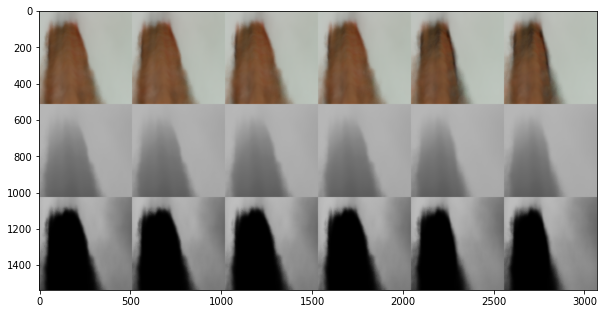

: 

In [7]:

exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)
import imageio
img_size = 512
#drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_3'
# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        
        output = runner_test.custom_batch_test_ctrl(batch, 'expr',normal=True)
        print(output.keys())
        plt.figure(figsize=(10,20))
        plt.imshow(output['ctrld_imgs'])

        

        
        #plt.imsave('{}/{}.png'.format('test_now','fgmask'), save_img)
  

In [ ]:
"""
exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)
import imageio
img_size = 512
#drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_3'
# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        
        output = runner_test.custom_batch_test_ctrl(batch)
        
        save_img = np.zeros((img_size, img_size*3, 3))
        save_img[:, 0:img_size, :] = output['+'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size:img_size*2, :] = output['_'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size*2:img_size*3, :] = output['0'].clamp_(0., 1.).cpu().numpy()
        
        save_img_ = np.zeros((img_size-1, (img_size-1)*3, 3))
        save_img_[:, (img_size-1)*0:(img_size-1)*1, :] = output['+_normal'].cpu().numpy().astype('uint8')
        save_img_[:, (img_size-1)*1:(img_size-1)*2, :] = output['-_normal'].cpu().numpy().astype('uint8')
        save_img_[:, (img_size-1)*2:(img_size-1)*3, :] = output['normal'].cpu().numpy().astype('uint8')
       
        #save_img[:, img_size*1:img_size*2, :] = np.stack((1-output['weight_fine'].clamp(0.0, 1.0).cpu().numpy()*3,),axis=-1)
        
        #print(output['weight_fine'].clamp(0.1,1).max())
        #print(output['weight_fine'].clamp(0.1,1).min())
        plt.imshow(save_img)
        plt.imshow(save_img_)
        imageio.imwrite('test_now/expr_ctrl.png',save_img)
        imageio.imwrite('test_now/expr_ctrl_normal.png',save_img_)
        #plt.imsave('{}/{}.png'.format('test_now','fgmask'), save_img)
  """

TypeError: custom_batch_test_ctrl() missing 1 required positional argument: 'option'

# Reenactment

torch.Size([1, 76])


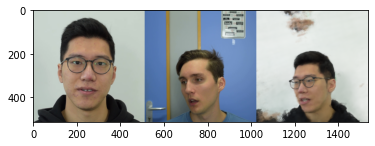

In [ ]:
exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)

img_size = 512
drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_2'

# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        print(batch['expression'].shape)
        
        output = runner_test.custom_batch_reenactment_test(batch,True,drv_path)

        
        save_img = np.zeros((img_size, img_size*3, 3))
        save_img[:, 0:img_size, :] = output['source'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size*1:img_size*2, :] = output['driving'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size*2:img_size*3, :] = output['pred'].clamp_(0., 1.).detach().cpu().numpy()
        plt.imshow(save_img)
        
        #plt.imsave('{}/{}.png'.format('test_now','2to1reenact'), save_img)
  

# Expr Swap


In [ ]:
exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)

img_size = 512
drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1'
# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        #print(batch['expression'].shape)
        
        output = runner_test.custom_batch_expr_swap_test(batch, drv_path)
        
        save_img = np.zeros((img_size, img_size*2, 3))
        save_img[:, 0:img_size, :] = output['expr_1'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size*1:img_size*2, :] = output['expr_2'].clamp_(0., 1.).cpu().numpy()
        plt.imshow(save_img)
        
        plt.imsave('{}/{}.png'.format('test_now','expr_control'), save_img)
  

# Pose Swap


In [ ]:
exp_name = 'test_now/'
os.makedirs(exp_name, exist_ok=True)

img_size = 512
drv_path = '/home/nas1_userB/sunghyun/Project/Sparse-Nerface/nerface_dataset/person_1'
# Check data
for batch_idx, batch in enumerate(test_loader):
    if batch_idx == 999:
        result = []
        #print(batch['expression'].shape)
        
        output = runner_test.custom_batch_pose_swap_test(batch, drv_path)
        
        save_img = np.zeros((img_size, img_size*2, 3))
        save_img[:, 0:img_size, :] = output['pose_1'].clamp_(0., 1.).cpu().numpy()
        save_img[:, img_size*1:img_size*2, :] = output['pose_2'].clamp_(0., 1.).cpu().numpy()
        plt.imshow(save_img)
        
        plt.imsave('{}/{}.png'.format('test_now','pose_control'), save_img)
  

In [ ]:

import json
with open(os.path.join(drv_path, "transforms_val.json"), "r") as fp:
        drv_json = json.load(fp)

In [ ]:
drv_json['intrinsics']

In [ ]:
import json
with open(os.path.join(drv_path.replace('person_2','person_1'), "transforms_val.json"), "r") as fp:
        drv_json1 = json.load(fp)
drv_json1['intrinsics'], drv_path.replace('person_2','person_1')
drv_data = drv_json1['frames']
#drv_data[0]
drv_json
#print(drv_json1)
#drv_json1['frames'][0]['expression']